# Part I - Linear Clasifier

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

#parameters
iterations = 300
lr = 1.6e-2   #learning rate
lr_decay= 0.998  #learning rate decay
reg = 5e-6

loss_history = []
train_acc_history = []   #training set accuracy history
val_loss_history = []   #testing set loss history
val_acc_history = []     #testing set accuracy history

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1)+b1  #pedicted label
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1) #loss function
    #training set accuracy
    accuracy =1/batch_size*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum() 

    loss_history.append(loss)
    train_acc_history.append(accuracy)

    #loss and accuracy values of the test set in each epoch; this doesnt contribute for the learning of the network
    test_y_pred = x_test.dot(w1)+b1
    test_loss = 1./Nte*np.square(test_y_pred-y_test).sum()+reg*np.sum(w1*w1)
    test_accuracy =1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(test_y_pred,axis=1))).sum()

    val_loss_history.append(test_loss)
    val_acc_history.append(test_accuracy)


    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw1 = x.T.dot(dy_pred)+reg*w1
    db1 = dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing losses and accuracies
    if t%10==0:
        print('iteration %d / %d : loss %f : accuracy %f : test_loss %f : test_accuracy %f '%(t,iterations,loss,accuracy,test_loss,test_accuracy))
       # print('iteration %d / %d : loss %f '%(t,iterations,loss))






x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300 : loss 1.000025 : accuracy 0.079460 : test_loss 1.000031 : test_accuracy 0.077100 
iteration 10 / 300 : loss 0.870374 : accuracy 0.358920 : test_loss 0.870106 : test_accuracy 0.356200 
iteration 20 / 300 : loss 0.836339 : accuracy 0.375800 : test_loss 0.836282 : test_accuracy 0.376300 
iteration 30 / 300 : loss 0.818542 : accuracy 0.384580 : test_loss 0.818726 : test_accuracy 0.384100 
iteration 40 / 300 : loss 0.808503 : accuracy 0.390420 : test_loss 0.808933 : test_accuracy 0.389300 
iteration 50 / 300 : loss 0.802494 : accuracy 0.395060 : test_loss 0.803174 : test_accuracy 0.391200 
iteration 60 / 300 : loss 0.798664 : accuracy 0.397820 : test_loss 0.799595 : test_accuracy 0.392400 
iteration 70 / 300 : loss 0.796060 : accuracy 0.400640 : test_loss 0.797237 : test_accuracy 0.394100 
iteration 80 / 300 : loss 0.794175 : accuracy 0.402580 : test_loss 0.795589 : test_accuracy 0.395600 
i

# Plot the training and testing loss and accuracies

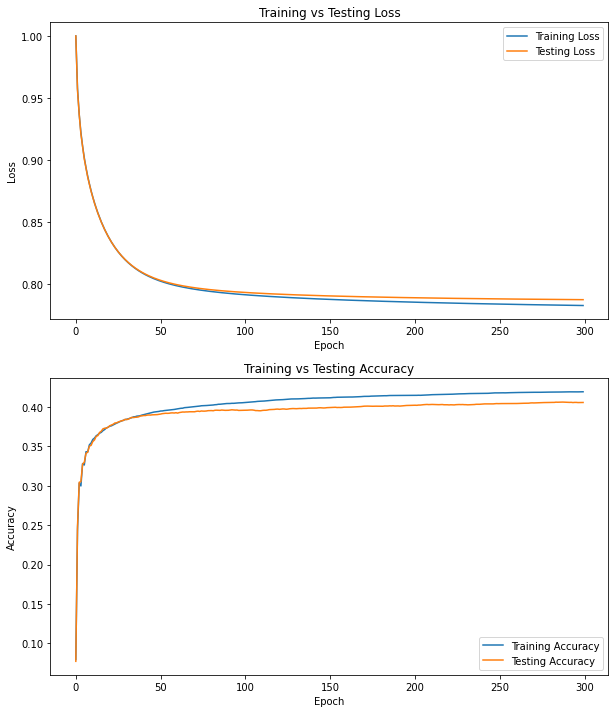

In [43]:
fig,ax = plt.subplots(2,1,figsize=(10,12))
ax[0].plot(loss_history,label='Training Loss')
ax[0].plot(val_loss_history,label='Testing Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
#ax[0].set_ylim([0,1])
ax[0].set_title('Training vs Testing Loss')
ax[0].legend(loc='upper right')

ax[1].plot(train_acc_history,label='Training Accuracy')
ax[1].plot(val_acc_history,label='Testing Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
#ax[1].set_ylim([0,1])
ax[1].set_title('Training vs Testing Accuracy')
ax[1].legend(loc='lower right')


plt.show()

In [26]:
w1.shape

(3072, 10)

# Display the weights matrix

In [39]:
x_t = x_train
print('x_train->',x_t.shape)
y_pred = x_t.dot(w1)+b1

train_acc = 1/Ntr*(np.abs(np.argmax(y_train,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('train_acc = ',train_acc)


x_t = x_test
print('x_test->',x_t.shape)
y_pred = x_t.dot(w1)+b1

test_acc = 1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('test_acc = ',test_acc)

x_train-> (50000, 3072)
train_acc =  0.41952000000000006
x_test-> (10000, 3072)
test_acc =  0.4058


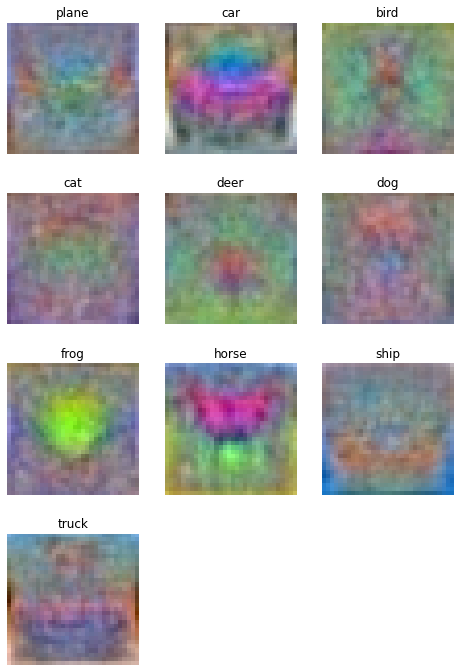

In [34]:
w1 = w1.reshape(32, 32, 3, 10)
w1_min, w1_max = np.min(w1), np.max(w1)
classes = ['plane', 'car', 'bird', 'cat',
 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(8,12))
#plt.figure(figsize=(8, 6))
for i in range(10):
   plt.subplot(4,3, i + 1)

   # Rescale the weights to be between 0 and 255
   wimg = 255.0 * (w1[:, :, :, i].squeeze() - w1_min) / (w1_max - w1_min)
   plt.imshow(wimg.astype('uint8'))
   plt.axis('off')
   plt.title(classes[i])